NAMA : Yusuf Surya Tryantono

NIM : 1301174268 ; Kelas : IF 41-12


Model yang akan digunakan adalah model seperti - KNN, regresi linier.


# **Upload Dataset**


Dalam dataset "used_cars", Atribut yang saya gunakan ialah, "odometer" dan "year". Odometer merupakan jarak tempuh jauh sebuah mobil selama pemakaian. Year ialah sebuah takaran waktu dimana seberapa mobil itu dipakai. Dua fitur ini dihubungkan dengan fitur "price".

**Libray yang saya gunakan**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import random as rd
warnings.filterwarnings('ignore')
%matplotlib inline

**Untuk membaca data csv yang sudah di upload dalam collab**

In [0]:
df = pd.read_csv('used_cars.csv')

**Cek Dataset**

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20001 non-null  int64  
 1   id            20001 non-null  int64  
 2   url           20001 non-null  object 
 3   region        20001 non-null  object 
 4   region_url    20001 non-null  object 
 5   price         20001 non-null  int64  
 6   year          19989 non-null  float64
 7   manufacturer  19296 non-null  object 
 8   model         19736 non-null  object 
 9   condition     10849 non-null  object 
 10  cylinders     12916 non-null  object 
 11  fuel          19928 non-null  object 
 12  odometer      17612 non-null  float64
 13  title_status  19891 non-null  object 
 14  transmission  19811 non-null  object 
 15  vin           13356 non-null  object 
 16  drive         15359 non-null  object 
 17  size          6886 non-null   object 
 18  type          16342 non-nu

In [202]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


**Menghapus data yang tidak akan dipakai**

In [0]:
#Drop data
df = df.drop(columns=['region_url', 'image_url', 'lat', 'long'])

In [204]:
df.shape

(20001, 22)

In [205]:
df.drop_duplicates(subset='url')
df.shape

(20001, 22)

Menemukan jumlah rata-rata Nans dan menjatuhkan baris dengan Nans lebih dari 95%

In [206]:
df.isnull().sum(axis=1).quantile(.95)

8.0

**9 nilai yang hilang per baris atau lebih sedang di hapuskan**


In [207]:
df = df[df.isnull().sum(axis=1) < 9]
df.shape

(19098, 22)

Menghapus semua harga yang sama dengan 0


In [208]:
df = df[df.price != 0]
df.shape

(16677, 22)

In [209]:
df = df[df.price < 100000]
df.shape

(16669, 22)

Menghapuskan sebagian data mobil dan hanya mobil dengan tahun di atas tahun 1985 yang tersisa


In [210]:
df = df[df.year > 1985]
df.shape

(16412, 22)

Menghapuskan semua jarak tempuh di atas 1.000.000 Mil 


In [211]:
df.odometer.quantile(.999)

1159338.6240000501

In [212]:
df = df[~(df.odometer > 500000)]
df.shape

(16384, 22)

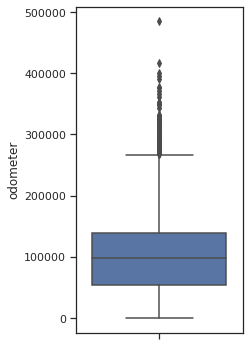

In [213]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=df);

In [214]:
df.shape

(16384, 22)

# Klasifikasi Linear Regression


Klasifikasi linier mencapainya dengan membuat keputusan klasifikasi berdasarkan nilai kombinasi linear dari karakteristik. Karakteristik objek juga dikenal sebagai nilai fitur dan biasanya disajikan ke mesin dalam vektor yang disebut vektor fitur. 
Berikut ilustrasinya: 

![teks alternatif](https://images.app.goo.gl/A9p7Ri9bftuHtNK47)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules

In [0]:
df_to_learn = df[['odometer','year','price']]

In [217]:
df_to_learn = df_to_learn.dropna()
df_to_learn.shape

(15165, 3)

In [0]:
df_train, df_test = split(df_to_learn, train_size=0.6, random_state=4222)

In [0]:
X_train = df_train[['odometer','year']]
y_train = df_train['price']

In [0]:
cars_lm = LinearRegression(fit_intercept=True)

In [221]:
cars_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
print("The model intercept is: {}".format(cars_lm.intercept_))
print("The model coefficients are: {}".format(cars_lm.coef_[0]))

The model intercept is: -1470524.7367435861
The model coefficients are: -0.048806862341886595


In [223]:
X_train['Price_prediction'] = cars_lm.predict(X_train)
X_train.head()

,odometer,year,Price_prediction
17101,165000.0,2005.0,6687.806415
7390,58941.0,2015.0,19272.022283
15019,126000.0,2009.0,11554.397588
876,159000.0,2012.0,12166.113787
11198,94700.0,2009.0,13082.052379


In [224]:
cars_train_rmse = np.sqrt(MSE(y_train, X_train['Price_prediction']))
print("RMSE = {:.2f}".format(cars_train_rmse))

RMSE = 8190.41


In [0]:
cars_lm_test = LinearRegression()

In [0]:
X_test = df_test[['odometer','year']]
y_test = df_test['price']

In [227]:
cars_lm_test.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [228]:
X_test['price_prediction'] = cars_lm_test.predict(X_test)
X_test.head()

,odometer,year,price_prediction
5843,126000.0,2008.0,10901.851101
19857,34844.0,2015.0,20628.304578
9714,64735.0,2013.0,17655.159550
19921,31550.0,2014.0,20062.417480
13479,62748.0,2014.0,18487.618631


In [229]:
cars_test_rmse = np.sqrt(MSE(y_test, X_test['price_prediction']))
print("RMSE = {:.2f}".format(cars_test_rmse))

RMSE = 8311.35


Melanjutkan dengan kesederhanaan - menambahkan parameter kategorikal dan mari kita lihat apakah prediksi membaik:

kondisi

title_status

transmisi

In [0]:
df_to_learn2 = df[['odometer','year','price', 'transmission', 'title_status', 'condition']]

In [231]:
df_to_learn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16384 entries, 0 to 20000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   odometer      15165 non-null  float64
 1   year          16384 non-null  float64
 2   price         16384 non-null  int64  
 3   transmission  16204 non-null  object 
 4   title_status  16292 non-null  object 
 5   condition     10118 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 896.0+ KB


Dari hal ini  dapat melihat bahwa kondisinya memiliki 200000 nans dan karena hal itu tidak akan menyertakan parameter ini

In [232]:
df_to_learn2 = df[['odometer','year','price', 'transmission', 'title_status']]
df_to_learn2 = df_to_learn2.dropna()
df_to_learn2.shape

(14894, 5)

In [233]:
df_to_learn2.head()

,odometer,year,price,transmission,title_status
0,63500.0,2012.0,17899,manual,clean
2,7554.0,2015.0,46463,automatic,clean
4,70150.0,2018.0,49999,automatic,clean
5,120057.0,2009.0,13999,automatic,clean
6,95484.0,2017.0,34500,automatic,clean


Inilah cara pertama untuk menetapkan dummies dalam categori value:

In [0]:
df_to_learn2['transmission_automatic'] = df_to_learn2['transmission'].apply(lambda x: 1 if x == 'automatic' else 0)
df_to_learn2['transmission_manual'] = df_to_learn2['transmission'].apply(lambda x: 1 if x == 'manual' else 0)
df_to_learn2['transmission_other'] = df_to_learn2['transmission'].apply(lambda x: 1 if x == 'other' else 0)

In [235]:
df_to_learn2 = df_to_learn2.reset_index()
df_to_learn2.head()

,index,odometer,year,price,transmission,title_status,transmission_automatic,transmission_manual,transmission_other
0,0,63500.0,2012.0,17899,manual,clean,0,1,0
1,2,7554.0,2015.0,46463,automatic,clean,1,0,0
2,4,70150.0,2018.0,49999,automatic,clean,1,0,0
3,5,120057.0,2009.0,13999,automatic,clean,1,0,0
4,6,95484.0,2017.0,34500,automatic,clean,1,0,0


In [0]:
dum = pd.get_dummies(df_to_learn2['title_status']).reset_index()

In [237]:
dum.head()

,index,clean,lien,missing,rebuilt,salvage
0,0,1,0,0,0,0
1,1,1,0,0,0,0
2,2,1,0,0,0,0
3,3,1,0,0,0,0
4,4,1,0,0,0,0


In [0]:
df_to_learn2 = pd.merge(df_to_learn2, dum, on='index')
df_to_learn2 = df_to_learn2.drop(columns=['index', 'transmission', 'title_status'])

In [239]:
df_to_learn2.head()

,odometer,year,price,transmission_automatic,transmission_manual,transmission_other,clean,lien,missing,rebuilt,salvage
0,63500.0,2012.0,17899,0,1,0,1,0,0,0,0
1,7554.0,2015.0,46463,1,0,0,1,0,0,0,0
2,70150.0,2018.0,49999,1,0,0,1,0,0,0,0
3,120057.0,2009.0,13999,1,0,0,1,0,0,0,0
4,95484.0,2017.0,34500,1,0,0,1,0,0,0,0


In [240]:
df_train2, df_test2 = split(df_to_learn2, train_size=0.6, random_state=4222)
X_train2 = df_train2[['odometer','year', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'clean', 'lien', 'missing',  'rebuilt', 'salvage']]
y_train2 = df_train2['price']
cars_lm2 = LinearRegression(fit_intercept=True)
cars_lm2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [241]:
print("The model intercept is: {}".format(cars_lm2.intercept_))
print("The model coefficients are: {}".format(cars_lm2.coef_[0]))
X_train2['Price_prediction'] = cars_lm2.predict(X_train2)
cars_train_rmse2 = np.sqrt(MSE(y_train2, X_train2['Price_prediction']))
print("RMSE = {:.2f}".format(cars_train_rmse2))

The model intercept is: -1312688.0253320513
The model coefficients are: -0.04449372376466743
RMSE = 7747.79


In [242]:
cars_lm_test2 = LinearRegression()
X_test2 = df_test2[['odometer','year', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'clean', 'lien', 'missing', 'rebuilt', 'salvage']]
y_test2 = df_test2['price']
cars_lm_test2.fit(X_test2, y_test2)
X_test2['price_prediction'] = cars_lm_test2.predict(X_test2)
X_test2.head()
cars_test_rmse2 = np.sqrt(MSE(y_test2, X_test2['price_prediction']))
print("RMSE = {:.2f}".format(cars_test_rmse2))

RMSE = 7814.81


# Klasifikasi KNN 


dilanjutkan dengan menerapkan KNN regresi yang dimana akan memperjlas klasifikasi.

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [0]:
df_knn_train, df_knn_test = split(df_to_learn, train_size=0.6, random_state=4222)
X_first = df_knn_train.drop('price', axis=1)
y_first = df_knn_train['price']

X_second = df_knn_test.drop('price', axis=1)
y_second = df_knn_test['price']

Preprocessing – Scaling fitur

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_first_scaled = scaler.fit_transform(X_first)
X_first = pd.DataFrame(X_first_scaled)

X_second_scaled = scaler.fit_transform(X_second)
X_second = pd.DataFrame(X_second_scaled)

Melihat pada tingkat error untuk nilai k yang berbeda

In [246]:
rmse_val2 = [] #to store rmse values for different k
for K in range(20):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_first, y_first)  #fit the model
    pred=model.predict(X_second) #make prediction on test set
    error = sqrt(mean_squared_error(y_second, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 11002.07630581929
RMSE value for k=  2 is: 9827.433978299749
RMSE value for k=  3 is: 9484.114898082247
RMSE value for k=  4 is: 9226.263107377648
RMSE value for k=  5 is: 9057.842511328676
RMSE value for k=  6 is: 8890.596796395523
RMSE value for k=  7 is: 8728.824163924663
RMSE value for k=  8 is: 8621.506146300615
RMSE value for k=  9 is: 8541.69918742592
RMSE value for k=  10 is: 8481.474442145533
RMSE value for k=  11 is: 8431.808517738871
RMSE value for k=  12 is: 8406.954391036092
RMSE value for k=  13 is: 8358.633314161596
RMSE value for k=  14 is: 8327.99702751274
RMSE value for k=  15 is: 8312.555297744922
RMSE value for k=  16 is: 8297.195528383943
RMSE value for k=  17 is: 8269.08240076524
RMSE value for k=  18 is: 8254.331759941746
RMSE value for k=  19 is: 8237.156227626221
RMSE value for k=  20 is: 8222.315414224615


**Bagian ini akan melihat nilai 4 -7 akan menjadi bagian yang prediksi yang error**

RMSE juga jauh lebih signifikan dengan regresi linier sederhana

In [0]:
df_knn_train2, df_knn_test2 = split(df_to_learn2, train_size=0.6, random_state=4222)
X_first2 = df_knn_train2.drop('price', axis=1)
y_first2 = df_knn_train2['price']

X_second2 = df_knn_test2.drop('price', axis=1)
y_second2 = df_knn_test2['price']

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_first_scaled2 = scaler.fit_transform(X_first2)
X_first2 = pd.DataFrame(X_first_scaled2)

X_second_scaled2 = scaler.fit_transform(X_second2)
X_second2 = pd.DataFrame(X_second_scaled2)

In [249]:
rmse_val3 = [] 
K = 2
for i in range(5):
    K += 1
    model2 = neighbors.KNeighborsRegressor(n_neighbors = K)
    model2.fit(X_first2, y_first2)  
    pred2=model2.predict(X_second2) 
    error2 = sqrt(mean_squared_error(y_second2, pred2)) 
    rmse_val3.append(error2) 
    print('RMSE value for k= ' , K , 'is:', error2)

RMSE value for k=  3 is: 9468.265504959676
RMSE value for k=  4 is: 9010.952164770377
RMSE value for k=  5 is: 8729.193999098705
RMSE value for k=  6 is: 8531.540141516343
RMSE value for k=  7 is: 8332.383312887561


In [0]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, K)
accuracy

# Kesimpulan

Setelah data sudah ditrain juga di test pada data testing, dengan pertama menggukana metode reggresi linier dan KNN.
Terlihat bahwa dari 20 data RMSE tersebut bisa melihat data yang error maupun tidak.
Pada hasil terkahir diman semua data akhiri dengan akurasinya yang dimana menghasilkan 83%.